In [53]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
from plotnine import *
import numpy as np

# import data set, set directory
home_dir = "/home/tobias_giesemann/Dropbox/Uni_Master/02SS19/01Advanced_Statistical_Modelling/Essay/"

# using pandas dataframe as a similar data structure to R dataframes
nels_df = pd.read_csv(home_dir+"data/nels88.csv", sep=",")

#show head
nels_df.head()

,id_region,id_school,public,ratio,percmin,cstr,scsize,urban,id_student,math,homework,white,sex,ses,parented
0,2,1,public,19,0,2,3,2,3,48,1,white,female,-0.13,2
1,2,1,public,19,0,2,3,2,8,48,0,white,male,-0.39,2
2,2,1,public,19,0,2,3,2,13,53,0,white,male,-0.80,2
3,2,1,public,19,0,2,3,2,17,42,1,white,male,-0.72,2
4,2,1,public,19,0,2,3,2,27,43,2,white,female,-0.74,2


                            OLS Regression Results                            
Dep. Variable:                   math   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     84.64
Date:                Thu, 25 Jul 2019   Prob (F-statistic):           1.25e-17
Time:                        20:45:49   Log-Likelihood:                -958.18
No. Observations:                 260   AIC:                             1920.
Df Residuals:                     258   BIC:                             1927.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     44.0739      0.989     44.580      0.0

/home/tobias_giesemann/.local/lib/python3.6/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/tobias_giesemann/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/home/tobias_giesemann/.local/lib/python3.6/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


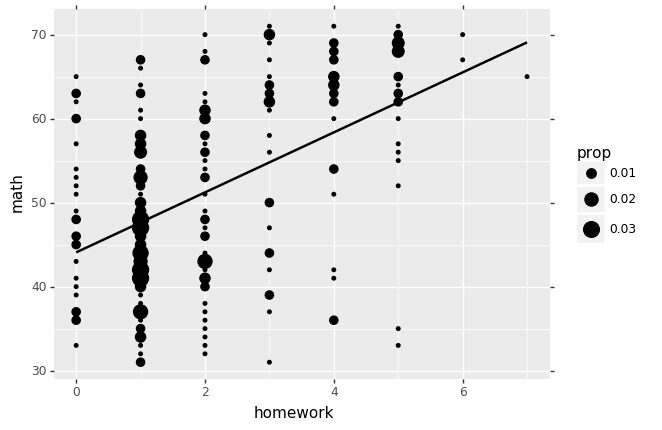

<ggplot: (8731428660018)>

In [47]:
# start with linear model for mean estimation

lm_const = smf.ols("math~1", data=nels_df).fit()
# print(lm_const.resid)



# check for homework-effort
lm_homework = smf.ols("math ~ homework", data = nels_df).fit()
print(lm_homework.summary())
lm_homework_intercept = 44.0739
(ggplot(data = nels_df,
       mapping = aes(x = "homework",
                     y = "math"
                     )
       ) +
  geom_count() +
  geom_smooth(method = "lm",
              se = False
              ))

/home/tobias_giesemann/.local/lib/python3.6/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/tobias_giesemann/.local/lib/python3.6/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


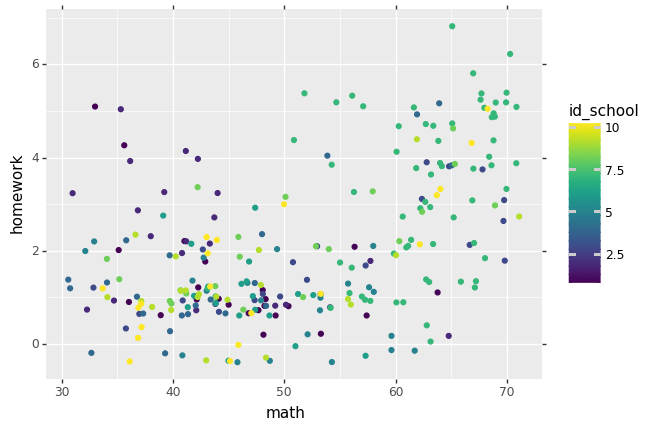

<ggplot: (-9223363305407798128)>

In [27]:
# This one doesn't work unfortunately
(ggplot(data = nels_df,
       mapping = aes(x = "math",
                     y = "homework", #should be the residuals...
                     color = "id_school"
                     )
       ) +
  geom_jitter( ))

## Separate Regression

/home/tobias_giesemann/.local/lib/python3.6/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/tobias_giesemann/.local/lib/python3.6/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


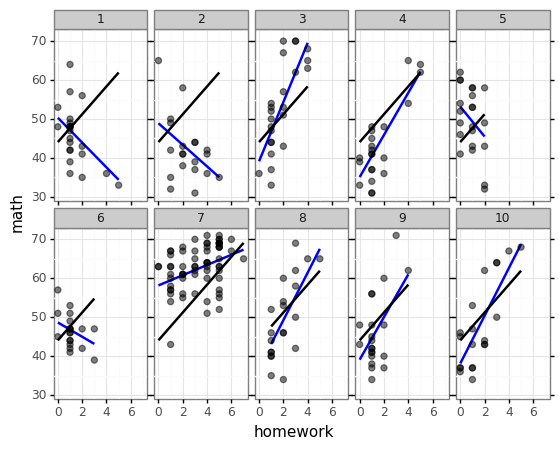

<ggplot: (8731433745819)>

In [59]:
# check for homework-effort

lm_separate = smf.mixedlm("math ~ homework", data = nels_df, groups = nels_df["id_school"], re_formula="~homework").fit()
(ggplot(data = nels_df,
       mapping = aes(x = "homework",
                     y = "math", 
                     group = "id_school"
                   ) 
       ) +
  geom_line(mapping=aes(y=lm_separate.fittedvalues
                        ),
            color="blue",
            size=1
            )+
  geom_line(mapping=aes(y=lm_homework.fittedvalues
                        ),
            color="black",
            size=1
            )+
  geom_point(alpha=0.5,size=2) +
  facet_wrap("~id_school",nrow=2)+
  theme_bw())

## Fixed Slope, random intercept

/home/tobias_giesemann/.local/lib/python3.6/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/tobias_giesemann/.local/lib/python3.6/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


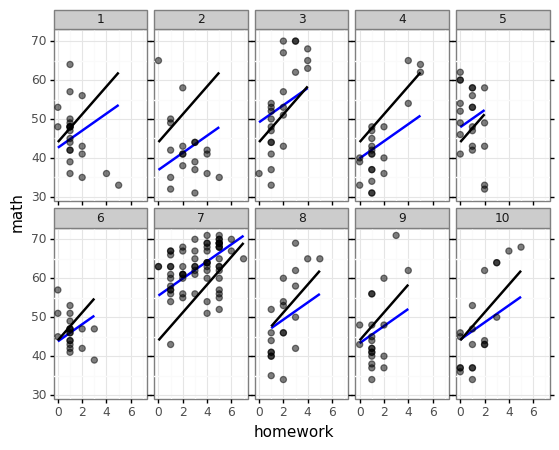

<ggplot: (8731433729505)>

In [51]:
# check for homework-effort
# fixed slope and random intercept
lm_const_slope = smf.mixedlm("math ~ 0 +homework", data = nels_df, groups = nels_df["id_school"]).fit()
(ggplot(data = nels_df,
       mapping = aes(x = "homework",
                     y = "math", 
                     group = "id_school"
                   ) 
       ) +
  geom_line(mapping=aes(y=lm_const_slope.fittedvalues
                        ),
            color="blue",
            size=1
            )+
  geom_line(mapping=aes(y=lm_homework.fittedvalues
                        ),
            color="black",
            size=1
            )+
  geom_point(alpha=0.5,size=2) +
  facet_wrap("~id_school",nrow=2)+
  theme_bw())

## Random Slope, Fixed Intercept

/home/tobias_giesemann/.local/lib/python3.6/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/tobias_giesemann/.local/lib/python3.6/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


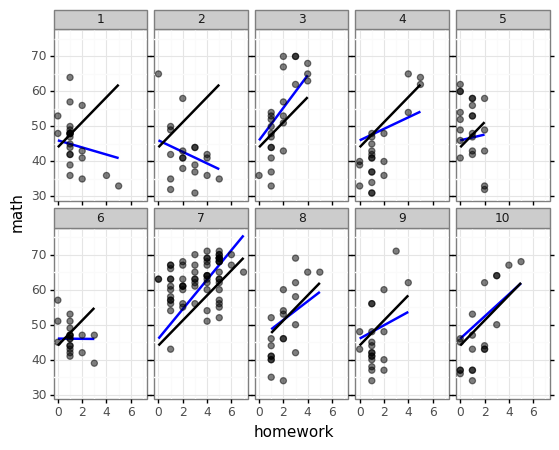

<ggplot: (8731433655395)>

In [60]:
# check for homework-effort

lm_fix_intercept = smf.mixedlm("math ~ homework", data = nels_df, groups = nels_df["id_school"], re_formula="~0+homework").fit()
(ggplot(data = nels_df,
       mapping = aes(x = "homework",
                     y = "math", 
                     group = "id_school"
                   ) 
       ) +
  geom_line(mapping=aes(y=lm_fix_intercept.fittedvalues
                        ),
            color="blue",
            size=1
            )+
  geom_line(mapping=aes(y=lm_homework.fittedvalues
                        ),
            color="black",
            size=1
            )+
  geom_point(alpha=0.5,size=2) +
  facet_wrap("~id_school",nrow=2)+
  theme_bw())